# Predicting Shelter Animal Outcomes

In [43]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
}else{
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for thie IPython notebook is by default hidden for easier reading. 
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
''')

## Background Information

#### Every year, approximately 7.6 million companion animals end up in US shelters. Many animals are given up as unwanted by their owners, while others are picked up after getting lost or taken out of cruelty situations. Many of these animals find forever families to take them home, but just as many are not so lucky. 2.7 million dogs and cats are euthanized in the US every year.

#### The dataset of intake information includes breed, color, sex, and age from the Austin Animal Cente.

#### We also believe this dataset can help us understand trends in animal outcomes. These insights could help shelters focus their energy on specific animals who need a little extra help finding a new home. 

## Importing the libraries

In [44]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [45]:
data = pd.read_csv('data/train.csv')

## Exploratory Data Analysis

In [46]:
# Summary
data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A705677,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [47]:
# See first 5 rows 
print data.head()

  AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
1  A656520    Emily  2013-10-13 12:44:00       Euthanasia      Suffering   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   
3  A683430      NaN  2014-07-11 19:09:00         Transfer        Partner   
4  A667013      NaN  2013-11-15 12:52:00         Transfer        Partner   

  AnimalType SexuponOutcome AgeuponOutcome                        Breed  \
0        Dog  Neutered Male         1 year        Shetland Sheepdog Mix   
1        Cat  Spayed Female         1 year       Domestic Shorthair Mix   
2        Dog  Neutered Male        2 years                 Pit Bull Mix   
3        Cat    Intact Male        3 weeks       Domestic Shorthair Mix   
4        Dog  Neutered Male        2 years  Lhasa Apso/Miniature Poodle   

         Color  
0  Brown/White  
1  Cream Tabby  
2   Blue/White  
3   Blue Cream  
4      

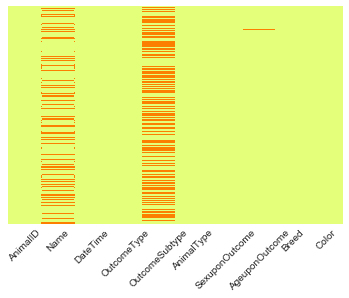

In [48]:
# Check for missing values
plot = sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Wistia')
for item in plot.get_xticklabels():
    item.set_rotation(45)

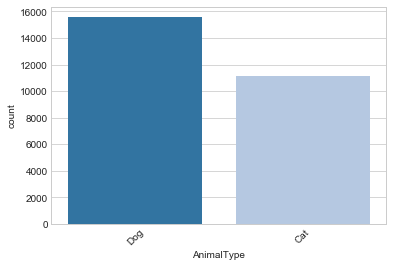

In [49]:
# Count of each animal type
plot = sns.countplot(data.AnimalType, palette='tab20')
for item in plot.get_xticklabels():
    item.set_rotation(45)

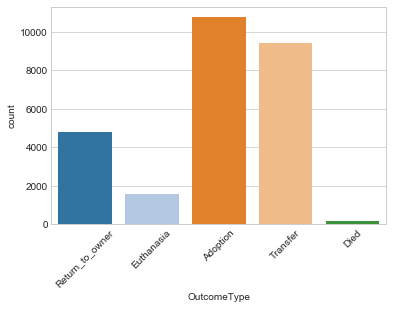

In [50]:
# Count of outcome type
plot = sns.countplot(data.OutcomeType, palette='tab20')
for item in plot.get_xticklabels():
    item.set_rotation(45)

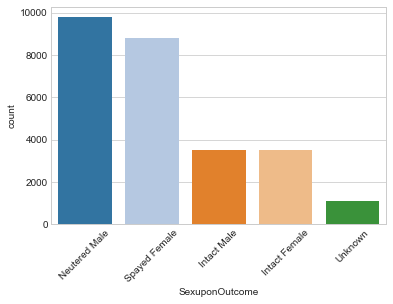

In [51]:
# Count of sex upon outcome
plot = sns.countplot(data.SexuponOutcome, palette='tab20')
for item in plot.get_xticklabels():
    item.set_rotation(45)

In [52]:
# Functions to get sex and neutered status
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

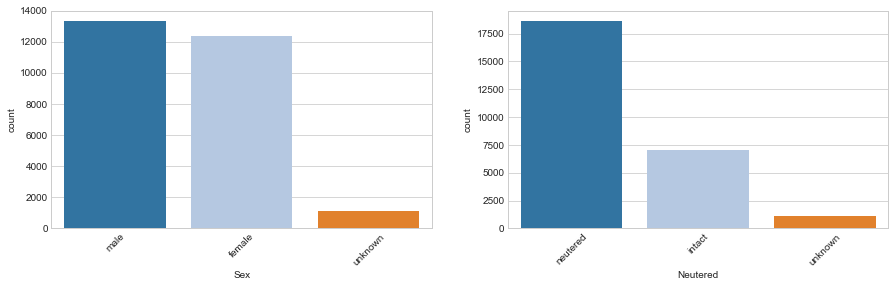

In [53]:
# Male/Female, Neutered/Intact
# Applying functions to data columns
data['Sex'] = data.SexuponOutcome.apply(get_sex)
data['Neutered'] = data.SexuponOutcome.apply(get_neutered)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot = sns.countplot(data.Sex, palette='tab20', ax=ax1)
for item in plot.get_xticklabels():
    item.set_rotation(45)
plot = sns.countplot(data.Neutered, palette='tab20', ax=ax2)
for item in plot.get_xticklabels():
    item.set_rotation(45)

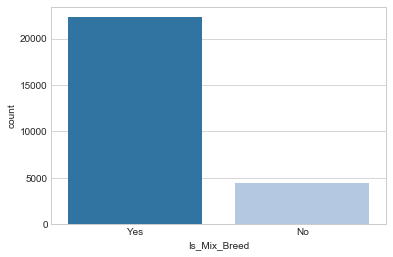

In [54]:
# Functions to get breed type
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'Yes'
    return 'No'
data['Is_Mix_Breed'] = data.Breed.apply(get_mix)
sns.countplot(data.Is_Mix_Breed, palette='tab20')

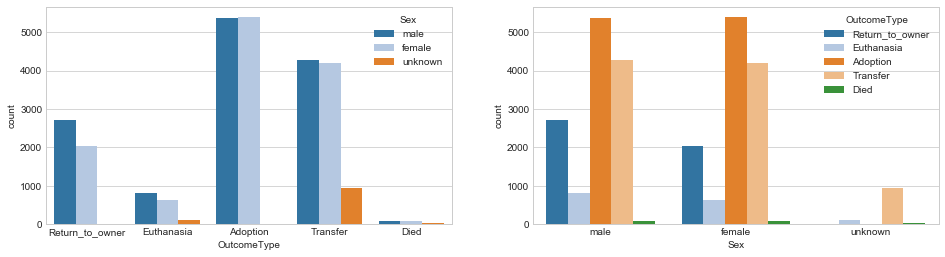

In [55]:
# Outcome base on Sex
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data, x='OutcomeType',hue='Sex', ax=ax1, palette='tab20')
sns.countplot(data=data, x='Sex',hue='OutcomeType', ax=ax2, palette='tab20')

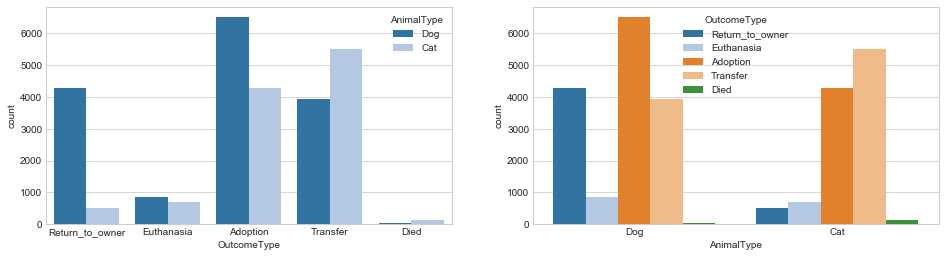

In [56]:
# Outcome base on Sex
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data, x='OutcomeType',hue='AnimalType', ax=ax1, palette='tab20')
sns.countplot(data=data, x='AnimalType',hue='OutcomeType', ax=ax2, palette='tab20')

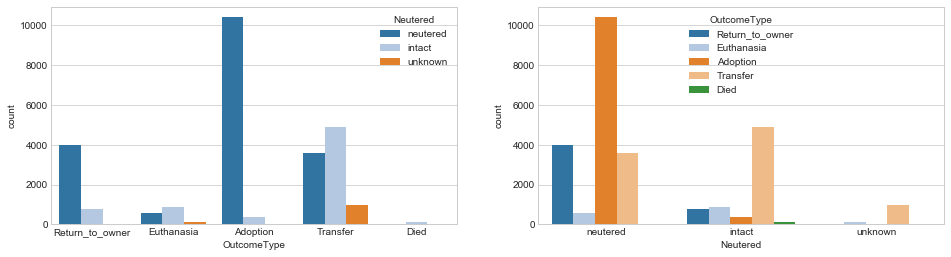

In [57]:
# Outcome base on neutered status
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data, x='OutcomeType',hue='Neutered', ax=ax1, palette='tab20')
sns.countplot(data=data, x='Neutered',hue='OutcomeType', ax=ax2, palette='tab20')

In [58]:
# Functions to get age in years
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

# def calc_age_in_days(x):
#     x = str(x)
#     if x == 'nan': return 0
#     age = int(x.split()[0])
#     if x.find('year') > -1: return age * 365. 
#     if x.find('month')> -1: return age * 30.
#     if x.find('week')> -1: return age * 7.
#     if x.find('day')> -1: return age 
#     else: return 0

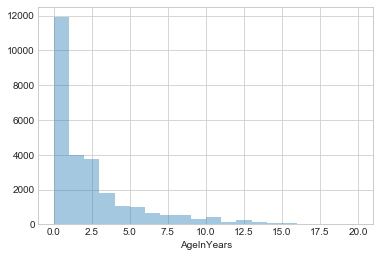

In [59]:
data['AgeInYears'] = data.AgeuponOutcome.apply(calc_age_in_years)
sns.distplot(data.AgeInYears, bins = 20, kde=False)

In [60]:
# data['AgeInDays'] = data.AgeuponOutcome.apply(calc_age_in_days)
# sns.distplot(data.AgeInDays, bins = 20, kde=False)

In [61]:
# Functions to get classify animals based on age
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'

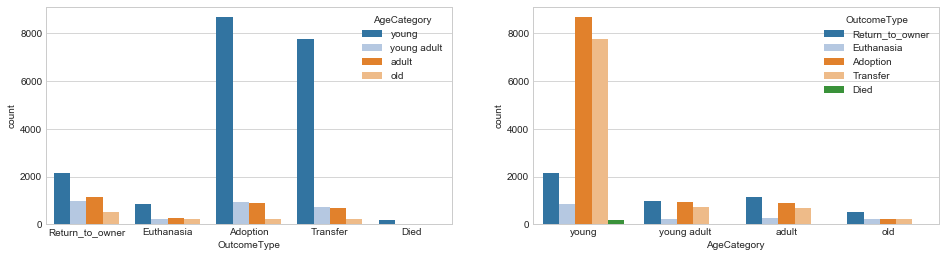

In [62]:
# Outcome base on age
data['AgeCategory'] = data.AgeInYears.apply(calc_age_category)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=data, x='OutcomeType',hue='AgeCategory', ax=ax1, palette='tab20')
sns.countplot(data=data, x='AgeCategory',hue='OutcomeType', ax=ax2, palette='tab20')

In [64]:
print data.head()

  AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
1  A656520    Emily  2013-10-13 12:44:00       Euthanasia      Suffering   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   
3  A683430      NaN  2014-07-11 19:09:00         Transfer        Partner   
4  A667013      NaN  2013-11-15 12:52:00         Transfer        Partner   

  AnimalType SexuponOutcome AgeuponOutcome                        Breed  \
0        Dog  Neutered Male         1 year        Shetland Sheepdog Mix   
1        Cat  Spayed Female         1 year       Domestic Shorthair Mix   
2        Dog  Neutered Male        2 years                 Pit Bull Mix   
3        Cat    Intact Male        3 weeks       Domestic Shorthair Mix   
4        Dog  Neutered Male        2 years  Lhasa Apso/Miniature Poodle   

         Color     Sex  Neutered Is_Mix_Breed  AgeInYears AgeCategory  
0  Brown/White    ma

## Uncertainty estimates of outcome types
https://www.kaggle.com/andraszsom/uncertainty-estimates-of-outcome-types

In [65]:
# Calculate confidence intervals

import scipy.stats
import numpy as np
    
def multinomial_CI(obs=[1,1],conf_level=0.95):
    """
    Calculate confidence intervals for multinomial distributions using Wilson score intervals:
    https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Wilson_score_interval
    
    Parameters
    ----------
    
    obs : list or numpy array with length n
        The observed occurences of each outcome.
    
    conf_level : float between 0 and 1
        The desired confidence level of the confidence interval. 0.95 is a 95% confidence level meaning that 
        the true outcome probability for which the difference between the true probability and the observed 
        rate is not statistically significant at the 5% level.
    
    Returns
    -------
    
    CI : numpy array with shape (n,2)
        The confidence intervales for each outcome. CI[:,0] is the lower end and CI[:,1] is the higher end.
    
    """
    alpha = (1e0-conf_level)
    z = scipy.stats.norm.ppf(1e0-alpha/2e0)
    n_tot = np.sum(obs)
    # observed probabilities
    probs = 1e0*np.array(obs) / n_tot
    
    CI = np.zeros([len(obs),2])
    
    term_pm = z * np.sqrt(probs*(1e0-probs)/n_tot + z**2/(4e0*n_tot**2))
    
    CI[:,0] = (probs + z**2/(2e0*n_tot) - term_pm) / (1e0 + z**2/n_tot)
    CI[:,1] = (probs + z**2/(2e0*n_tot) + term_pm) / (1e0 + z**2/n_tot)
        
    return CI

In [66]:
# Confidence intervals as a function of total counts if one outcome type is counted 0 times

n_sum = [10,30,100,300,1000]

for i in range(len(n_sum)):
    print('Total number of animals in the category:',n_sum[i])
    print('   The corresponding confidence interval of an outcome type with 0 animals is 0 -',np.around(multinomial_CI([0,n_sum[i]])[0,1]*100,2),'%')

('Total number of animals in the category:', 10)
('   The corresponding confidence interval of an outcome type with 0 animals is 0 -', 27.75, '%')
('Total number of animals in the category:', 30)
('   The corresponding confidence interval of an outcome type with 0 animals is 0 -', 11.35, '%')
('Total number of animals in the category:', 100)
('   The corresponding confidence interval of an outcome type with 0 animals is 0 -', 3.7000000000000002, '%')
('Total number of animals in the category:', 300)
('   The corresponding confidence interval of an outcome type with 0 animals is 0 -', 1.26, '%')
('Total number of animals in the category:', 1000)
('   The corresponding confidence interval of an outcome type with 0 animals is 0 -', 0.38, '%')


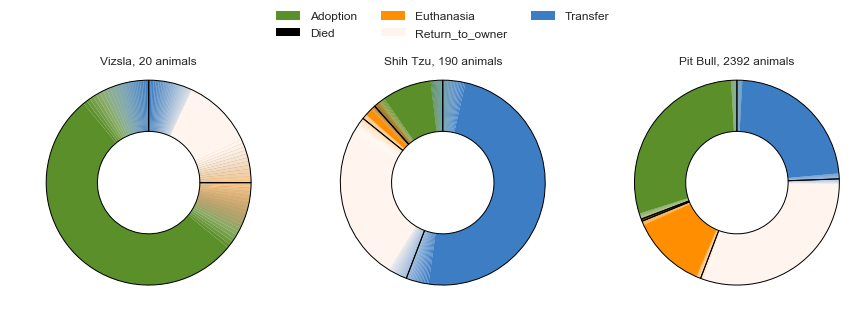

In [67]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Wedge
from matplotlib.collections import PatchCollection

# some outcomes:
# There are roughly 20, 200, and 2000 animals within these breeds (mixes are included!)
vizsla = [ 15.,   0.,   0.,   5.,   0.]
shih_tzu = [  22.,    0.,    5.,   57.,  106.]
pit_bull = [ 737.,    8.,  313.,  750.,  584.]

unique_outcomes = ['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']

def generate_wedges(data,colors,n_wedges,CI):

    angles = data / np.sum(data) * 360
    cumsum = np.cumsum(angles)
    cumsum = np.insert(cumsum,0,0)
    # the main wedges based on the observed rates, no facecolor just edges
    patches_border = []
    for i in range(len(data)):
        patches_border.append(Wedge((0,0),1,cumsum[i]+90,cumsum[i+1]+90,width=0.5,facecolor='none',edgecolor='k'))

    # lower CIs, no alpha    
    patches_low_CI = []
    for i in range(len(data)):
        wedge_center = (cumsum[i]+cumsum[i+1])/2e0+90
        patches_low_CI.append(Wedge((0,0),1,wedge_center - CI[i,0]/2*360,wedge_center + CI[i,0]/2*360,width=0.5,facecolor=colors[i],edgecolor='none',alpha=1))


    # add n_wedges small Wedges with succesively reduced alphas
    patches_transition = []
    for i in range(len(data)):
        wedge_center = (cumsum[i]+cumsum[i+1])/2e0+90
        step_angle_left = np.linspace(wedge_center - CI[i,0]/2*360,wedge_center - CI[i,1]/2*360,num=n_wedges+1,endpoint=True)
        step_angle_right = np.linspace(wedge_center+CI[i,0]/2*360,wedge_center+CI[i,1]/2*360,num=n_wedges+1,endpoint=True)
        step_alpha = np.linspace(1,0,num=n_wedges,endpoint=False)
        for j in range(n_wedges):

            patches_transition.append(Wedge((0,0),1,step_angle_left[j+1],step_angle_left[j],width=0.5,facecolor=colors[i],edgecolor='none',alpha=step_alpha[j]))
            patches_transition.append(Wedge((0,0),1,step_angle_right[j],step_angle_right[j+1],width=0.5,facecolor=colors[i],edgecolor='none',alpha=step_alpha[j]))
    
    return patches_border,patches_low_CI,patches_transition

colors=['#5A8F29', 'k', '#FF8F00', '#FFF5EE', '#3C7DC4']
n_wedges = 30

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(131, aspect='equal')
plt.title('Vizsla, '+str(int(np.sum(vizsla)))+' animals')
# calculate confidence intervals
CI = multinomial_CI(vizsla)
# generate wedges
patches_border,patches_low_CI,patches_transition = generate_wedges(vizsla,colors,n_wedges,CI)
# plot
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.axis('off')
for p in patches_transition:
    ax1.add_patch(p)
legend = []
for p in patches_low_CI:
    wedge = ax1.add_patch(p)
    legend.append(wedge)
for p in patches_border:
    ax1.add_patch(p)

ax2 = fig.add_subplot(132, aspect='equal')
plt.title('Shih Tzu, '+str(int(np.sum(shih_tzu)))+' animals')
# calculate confidence intervals
CI = multinomial_CI(shih_tzu)
# generate wedges
patches_border,patches_low_CI,patches_transition = generate_wedges(shih_tzu,colors,n_wedges,CI)
#plot
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.axis('off')
for p in patches_transition:
    ax2.add_patch(p)
legend = []
for p in patches_low_CI:
    wedge = ax2.add_patch(p)
    legend.append(wedge)
for p in patches_border:
    ax2.add_patch(p)

ax3 = fig.add_subplot(133, aspect='equal')
plt.title('Pit Bull, '+str(int(np.sum(pit_bull)))+' animals')
# calculate confidence intervals
CI = multinomial_CI(pit_bull)
# generate wedges
patches_border,patches_low_CI,patches_transition = generate_wedges(pit_bull,colors,n_wedges,CI)
#plot
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.axis('off')

legend = []
for p in patches_low_CI:
    wedge = ax3.add_patch(p)
    legend.append(wedge)
for p in patches_transition:
    ax3.add_patch(p)
for p in patches_border:
    ax3.add_patch(p)
    
ax2.legend(legend,unique_outcomes,loc='center',fontsize=12,bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True)
    
plt.tight_layout(w_pad=4)
plt.savefig('figures/outcome_uncertainty.jpg',dpi=150)
plt.show()